|Challenge Set 3|
|---------------|
|Topic: |Linear Regression and Train/Split|
|Date: |07/25/2017|
|Name: |Jessica Cox|

In [267]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [268]:
#downloading data on flights in and out of atlanta october 2008
import pandas as pd    

!cURL -O "http://www.stat.ufl.edu/~winner/data/atltime1004a.dat"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1130k  100 1130k    0     0  1426k      0 --:--:-- --:--:-- --:--:-- 1427k


In [269]:
with open('atltime1004a.dat','r') as f:
    next(f) # skip first row
    df = pd.DataFrame(l.rstrip().split() for l in f)

df.head()

,0,1,2,3,4,5,6
0,1,1125N660DL,ABQ,18,211,204,1250
1,1,1589N678DL,ABQ,23,206,212,1250
2,2,833N659DL,ABQ,18,204,194,1250
3,2,1125N656DL,ABQ,23,211,210,1250
4,2,1589N665DN,ABQ,19,206,212,1250


In [270]:
columns = ['day', 'flight_num', 'destination', 'taxi_time', 'sched_time', 'actual_time', 'distance']

In [271]:
df.columns = columns

In [272]:
df.head()

,day,flight_num,destination,taxi_time,sched_time,actual_time,distance
0,1,1125N660DL,ABQ,18,211,204,1250
1,1,1589N678DL,ABQ,23,206,212,1250
2,2,833N659DL,ABQ,18,204,194,1250
3,2,1125N656DL,ABQ,23,211,210,1250
4,2,1589N665DN,ABQ,19,206,212,1250


In [273]:
df['flight_no'], df['tail'] = zip(*df['flight_num'].map(lambda x: x.split('N')))

In [275]:
#del df['flight_num'] 
del df['flight_num']


KeyError: 'flight_num'

In [284]:
len(df)

17811

In [285]:
df['ones'] = 1

In [286]:
for col in ['day', 'taxi_time', 'sched_time', 'actual_time', 'distance', 'ones']:
    df[col] = df[col].astype(int)
    
    
#delete all canceled flights from database
df = df[df.actual_time != 0]

In [287]:
len(df)

17723

In [289]:
df.head()

,day,destination,taxi_time,sched_time,actual_time,distance,flight_no,tail,ones
0,1,ABQ,18,211,204,1250,1125,660DL,1
1,1,ABQ,23,206,212,1250,1589,678DL,1
2,2,ABQ,18,204,194,1250,833,659DL,1
3,2,ABQ,23,211,210,1250,1125,656DL,1
4,2,ABQ,19,206,212,1250,1589,665D,1


# challenge 1

Dataset:  Data represents actual flight times of all flights leaving from Atlanta for a particular month.  Features include: scheduled flight time, distance of flight, destination, flight number and tail number.


Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [290]:
from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [291]:
y_time = df['actual_time']

y, X = dmatrices('y_time ~ 1', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)

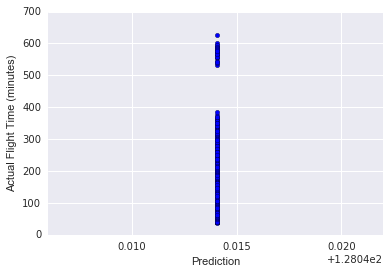

In [292]:
plt.scatter(pred, y)
plt.xlabel('Prediction')
plt.ylabel('Actual Flight Time (minutes)')
plt.show()

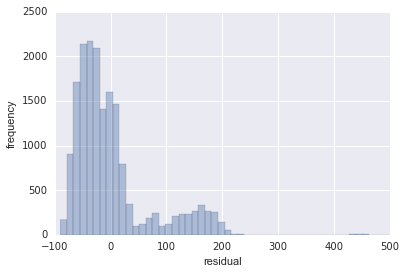

In [293]:
ax = sns.distplot(df.actual_time - pred, kde=False, rug=False)
ax.set(xlabel='residual', ylabel='frequency')
plt.show()

By trying to predict the outcome with a constant, in this case 1, you are forcing the line to cross at the mean of all the points.  The residual plot shows that most of them are negative, meaning most of the values are less than the average y.

# challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [294]:
y, X = dmatrices('y_time ~ 1 + distance', data=df, return_type='dataframe')
model2 = sm.OLS(y, X)
results2 = model2.fit()
pred2 = results2.predict(X)

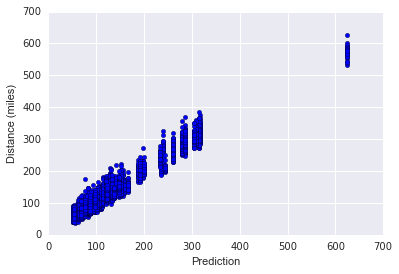

In [295]:
plt.scatter(pred2, y)
plt.xlabel('Prediction')
plt.ylabel('Distance (miles)')
plt.show()

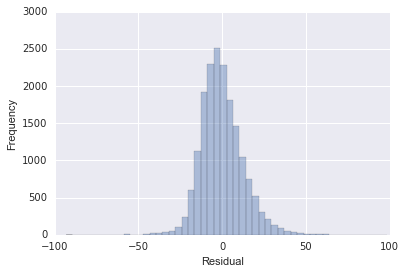

In [296]:
res = y.y_time - pred2
ax = sns.distplot(res, kde=False, rug=False)
ax.set(xlabel='Residual', ylabel='Frequency')
plt.show()

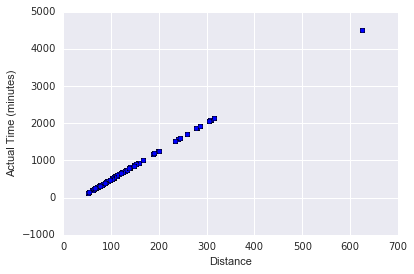

In [297]:
plt.scatter(pred2, X.distance)
plt.xlabel('Distance')
plt.ylabel('Actual Time (minutes)')
plt.show()

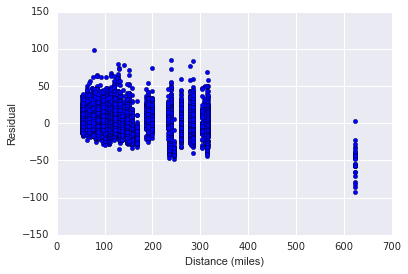

In [298]:
plt.scatter(pred2, res)
plt.xlabel('Distance (miles)')
plt.ylabel('Residual')
plt.show()

The model is now representing linear regression of the distance of the flight on the actual flight time.  The residuals are fairly normal, indicating a strong correlation between flight time and distance. 

# challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [299]:
df['destination'].unique()

array(['ABQ', 'ALB', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BTR', 'BWI',
       'CAE', 'CHS', 'CLE', 'CLT', 'CMH', 'COS', 'CVG', 'DAB', 'DAY',
       'DCA', 'DEN', 'DFW', 'DTW', 'ELP', 'EWR', 'FLL', 'GPT', 'GRR',
       'GSO', 'GSP', 'HNL', 'HOU', 'HSV', 'IAD', 'IAH', 'IND', 'JAN',
       'JAX', 'JFK', 'LAS', 'LAX', 'LEX', 'LGA', 'LIT', 'MCI', 'MCO',
       'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MLB', 'MOB', 'MSP', 'MSY',
       'MYR', 'OAK', 'OKC', 'OMA', 'ONT', 'ORD', 'ORF', 'PBI', 'PDX',
       'PHL', 'PHX', 'PIT', 'PNS', 'PVD', 'PWM', 'RDU', 'RIC', 'RSW',
       'SAN', 'SAT', 'SAV', 'SDF', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC',
       'SMF', 'SNA', 'SRQ', 'STL', 'STT', 'SYR', 'TLH', 'TPA', 'TUL',
       'TUS', 'TYS', 'VPS'], dtype=object)

In [302]:
y_time = df['actual_time']

y, X = dmatrices('y_time ~ destination + 1', data=df, return_type='dataframe')
model3 = sm.OLS(y, X)
results3 = model3.fit()
pred3 = results3.predict(X)

In [303]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_time   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     7675.
Date:                Mon, 25 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:27:18   Log-Likelihood:                -67463.
No. Observations:               17723   AIC:                         1.351e+05
Df Residuals:                   17630   BIC:                         1.358e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            207.2527      1.144    181.124      0.000       205.010   209.496
destination[T.ALB]   -69.6882      1.507    -46.252      0.000       -72.642   -66.735
destination[T.AUS]   -63.9574      1.452    -44.041      0.000       -66.804   -61.111
destination[T.BDL]   -70.2435      1.363    -51.527      0.000       -72.916   -67.571
destination[T.BHM]  -151.8181      1.346   -112.781      0.000      -154.457  -149.180
destination[T.BNA]  -139.2044      1.373   -101.393      0.000      -141.896  -136.513
destination[T.BOS]   -60.8916      1.277    -47.687      0.000       -63.394   -58.389
destination[T.BTR]  -112.1826      1.844    -60.843      0.000      -115.797  -108.569
destination[T.BWI]  -103.7769      1.277    -81.294      0.000      -106.279  -101.275
destination[T.CAE]  -149.4282      1.534    -97.383      0.000      -152.436  -146.421
destination[T.CHS]  -137.4800      1.409    -97.547      0.000      -140.243  -134.718
destination[T.CLE]  -104.6585      1.411    -74.187      0.000      -107.424  -101.893
destination[T.CLT]  -138.9614      1.352   -102.797      0.000      -141.611  -136.312
destination[T.CMH]  -118.5892      1.363    -86.991      0.000      -121.261  -115.917
destination[T.COS]   -10.0431      1.798     -5.587      0.000       -13.566    -6.520
destination[T.CVG]  -115.8479      1.339    -86.547      0.000      -118.472  -113.224
destination[T.DAB]  -134.0190      1.443    -92.858      0.000      -136.848  -131.190
destination[T.DAY]  -119.2527      1.363    -87.478      0.000      -121.925  -116.581
destination[T.DCA]  -105.4393      1.267    -83.209      0.000      -107.923  -102.956
destination[T.DEN]    -8.1376      1.318     -6.173      0.000       -10.722    -5.554
destination[T.DFW]   -65.1072      1.261    -51.649      0.000       -67.578   -62.636
destination[T.DTW]   -91.0552      1.342    -67.875      0.000       -93.685   -88.426
destination[T.ELP]     0.5860      2.270      0.258      0.796        -3.863     5.035
destination[T.EWR]   -76.9003      1.285    -59.854      0.000       -79.419   -74.382
destination[T.FLL]  -103.8825      1.287    -80.709      0.000      -106.405  -101.360
destination[T.GPT]  -132.6527      5.014    -26.457      0.000      -142.480  -122.825
destination[T.GRR]   -91.0989      2.427    -37.530      0.000       -95.857   -86.341
destination[T.GSO]  -132.8891      1.334    -99.597      0.000      -135.504  -130.274
destination[T.GSP]  -154.0380      1.452   -106.070      0.000      -156.885  -151.191
destination[T.HNL]   366.8763      2.270    161.620      0.000       362.427   371.326
destination[T.HOU]   -74.9446      1.415    -52.967      0.000       -77.718   -72.171
destination[T.HSV]  -146.5474      1.541    -95.129      0.000      -149.567  -143.528
destination[T.IAD]  -102.4838      1.3

In this example, the constant is forcing the coefficient of each dsetination to be the mean flight time.  

# challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [304]:
y_time = df['actual_time']

y, X = dmatrices('y_time ~ destination + sched_time + distance', data=df, return_type='dataframe')
model4 = sm.OLS(y, X)
results4 = model4.fit()
pred4 = results4.predict(X)

In [305]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_time   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     8370.
Date:                Mon, 25 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:28:18   Log-Likelihood:                -66618.
No. Observations:               17723   AIC:                         1.334e+05
Df Residuals:                   17629   BIC:                         1.342e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              9.1282      0.731     12.483      0.000         7.695    10.562
destination[T.ALB]    -1.6369      1.299     -1.260      0.208        -4.183     0.909
destination[T.AUS]    -0.3294      1.144     -0.288      0.773        -2.573     1.914
destination[T.BDL]    -4.7349      1.112     -4.260      0.000        -6.914    -2.556
destination[T.BHM]     0.6612      0.737      0.897      0.369        -0.783     2.105
destination[T.BNA]    -0.2089      0.801     -0.261      0.794        -1.778     1.361
destination[T.BOS]    -3.9768      1.068     -3.724      0.000        -6.070    -1.884
destination[T.BTR]    -2.0980      1.458     -1.439      0.150        -4.955     0.759
destination[T.BWI]    -3.1662      0.827     -3.827      0.000        -4.788    -1.544
destination[T.CAE]    -1.9880      1.025     -1.940      0.052        -3.997     0.021
destination[T.CHS]    -0.0839      0.868     -0.097      0.923        -1.786     1.618
destination[T.CLE]    -3.4988      0.986     -3.547      0.000        -5.432    -1.565
destination[T.CLT]    -0.5650      0.771     -0.732      0.464        -2.077     0.947
destination[T.CMH]    -2.0517      0.882     -2.325      0.020        -3.781    -0.322
destination[T.COS]    -0.9164      1.676     -0.547      0.585        -4.202     2.370
destination[T.CVG]     1.8655      0.805      2.318      0.020         0.288     3.443
destination[T.DAB]    -6.7409      0.966     -6.977      0.000        -8.635    -4.847
destination[T.DAY]    -2.9156      0.874     -3.336      0.001        -4.629    -1.203
destination[T.DCA]    -0.7428      0.802     -0.927      0.354        -2.314     0.829
destination[T.DEN]    -0.5982      1.219     -0.491      0.624        -2.988     1.791
destination[T.DFW]     3.8180      0.870      4.390      0.000         2.113     5.523
destination[T.DTW]     0.4555      0.904      0.504      0.614        -1.316     2.227
destination[T.ELP]     0.2568      2.169      0.118      0.906        -3.995     4.508
destination[T.EWR]    -1.0543      0.918     -1.148      0.251        -2.854     0.746
destination[T.FLL]    -4.7087      0.843     -5.587      0.000        -6.361    -3.057
destination[T.GPT]    -9.4402      4.616     -2.045      0.041       -18.488    -0.393
destination[T.GRR]    -5.0361      2.130     -2.365      0.018        -9.210    -0.862
destination[T.GSO]    -0.9538      0.775     -1.231      0.218        -2.473     0.565
destination[T.GSP]    -0.6675      0.907     -0.736      0.462        -2.445     1.110
destination[T.HNL]   -20.1049      4.028     -4.992      0.000       -28.000   -12.210
destination[T.HOU]    -0.0043      1.042     -0.004      0.997        -2.048     2.039
destination[T.HSV]     1.3153      1.020      1.289      0.197        -0.684     3.315
destination[T.IAD]    -1.2861      0.8

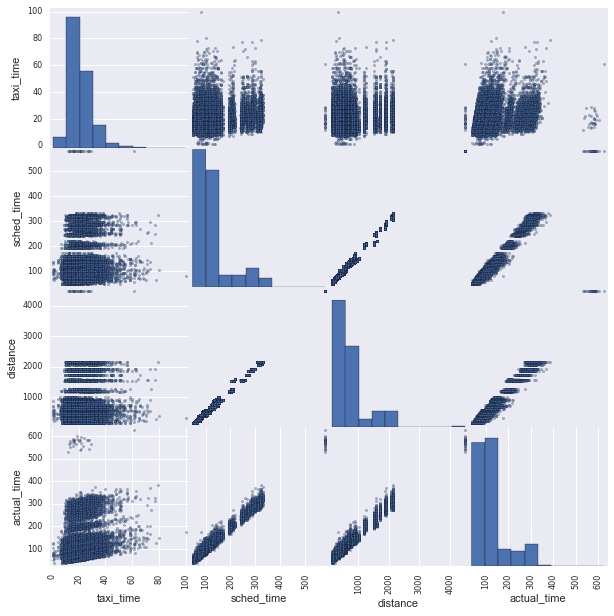

In [307]:
df = df[['destination', 'taxi_time', 'sched_time', 'distance', 'flight_no', 'actual_time']]
plt.rcParams['figure.figsize'] = (10,10)
_ = pd.tools.plotting.scatter_matrix(df)

In [308]:
df['taxi_time_log'] = np.log(df.taxi_time)
df['sched_time_log'] = np.log(df.sched_time)
df['distance_log'] = np.log(df.distance)
df['actual_time_log'] = np.log(df.actual_time)

In [309]:
df.describe()

,taxi_time,sched_time,distance,actual_time,taxi_time_log,sched_time_log,distance_log,actual_time_log
count,17723.000,17723.000,17723.000,17723.000,17723.000,17723.000,17723.000,17723.000
mean,20.836,128.474,712.374,128.054,2.962,4.743,6.353,4.737
std,8.536,69.666,522.811,69.753,0.387,0.452,0.646,0.460
min,1.000,48.000,132.000,38.000,0.000,3.871,4.883,3.638
25%,15.000,84.000,399.000,83.000,2.708,4.431,5.989,4.419
50%,19.000,106.000,568.000,106.000,2.944,4.663,6.342,4.663
75%,25.000,138.000,783.000,141.000,3.219,4.927,6.663,4.949
max,100.000,580.000,4496.000,627.000,4.605,6.363,8.411,6.441


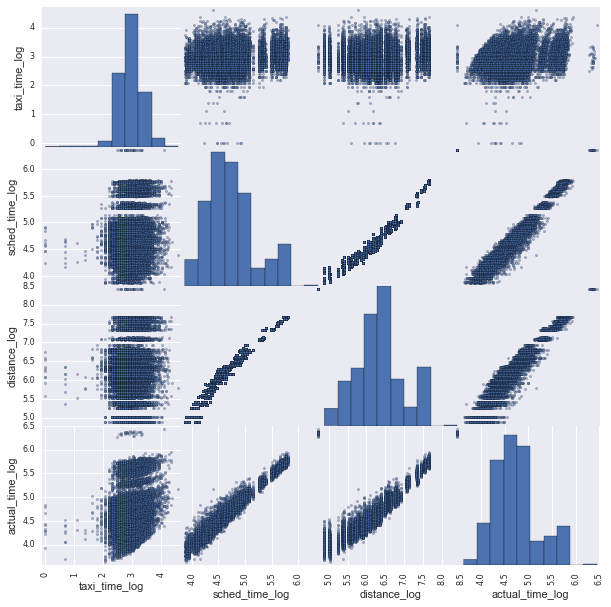

In [316]:
df = df[['taxi_time_log', 'sched_time_log', 'distance_log', 'actual_time_log', 'destination']]


plt.rcParams['figure.figsize'] = (10,10)
_ = pd.tools.plotting.scatter_matrix(df)

In [311]:
df.head()

,taxi_time_log,sched_time_log,distance_log,actual_time_log,destination
0,2.890,5.352,7.131,5.318,ABQ
1,3.135,5.328,7.131,5.357,ABQ
2,2.890,5.318,7.131,5.268,ABQ
3,3.135,5.352,7.131,5.347,ABQ
4,2.944,5.328,7.131,5.357,ABQ


In [313]:
y, X = dmatrices('actual_time_log ~ destination + sched_time_log + distance_log + taxi_time_log', data=df, return_type='dataframe')
model5 = sm.OLS(y, X)
results5 = model5.fit()
pred5 = results5.predict(X)
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_time_log   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.151e+04
Date:                Mon, 25 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:29:48   Log-Likelihood:                 25262.
No. Observations:               17723   AIC:                        -5.033e+04
Df Residuals:                   17628   BIC:                        -4.959e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.1586      0.016    -10.120      0.000        -0.189    -0.128
destination[T.ALB]    -0.0768      0.007    -10.259      0.000        -0.092    -0.062
destination[T.AUS]    -0.0161      0.007     -2.381      0.017        -0.029    -0.003
destination[T.BDL]    -0.0505      0.007     -7.738      0.000        -0.063    -0.038
destination[T.BHM]     0.1411      0.005     29.309      0.000         0.132     0.151
destination[T.BNA]     0.0633      0.005     14.034      0.000         0.054     0.072
destination[T.BOS]    -0.0500      0.006     -8.041      0.000        -0.062    -0.038
destination[T.BTR]    -0.0301      0.008     -3.644      0.000        -0.046    -0.014
destination[T.BWI]    -0.0625      0.005    -12.557      0.000        -0.072    -0.053
destination[T.CAE]     0.0220      0.005      4.018      0.000         0.011     0.033
destination[T.CHS]    -0.0119      0.005     -2.589      0.010        -0.021    -0.003
destination[T.CLE]    -0.0514      0.006     -8.878      0.000        -0.063    -0.040
destination[T.CLT]     0.0491      0.004     11.661      0.000         0.041     0.057
destination[T.CMH]    -0.0553      0.005    -10.916      0.000        -0.065    -0.045
destination[T.COS]    -0.0301      0.009     -3.172      0.002        -0.049    -0.011
destination[T.CVG]     0.0190      0.004      4.230      0.000         0.010     0.028
destination[T.DAB]    -0.1235      0.005    -22.931      0.000        -0.134    -0.113
destination[T.DAY]    -0.0636      0.005    -12.726      0.000        -0.073    -0.054
destination[T.DCA]    -0.0591      0.005    -12.251      0.000        -0.069    -0.050
destination[T.DEN]    -0.0010      0.007     -0.151      0.880        -0.015     0.013
destination[T.DFW]     0.0191      0.005      3.610      0.000         0.009     0.029
destination[T.DTW]    -0.0105      0.005     -1.947      0.052        -0.021  7.01e-05
destination[T.ELP]    -0.0011      0.012     -0.093      0.926        -0.025     0.023
destination[T.EWR]    -0.0349      0.006     -6.254      0.000        -0.046    -0.024
destination[T.FLL]    -0.0986      0.005    -19.429      0.000        -0.109    -0.089
destination[T.GPT]    -0.0597      0.026     -2.304      0.021        -0.110    -0.009
destination[T.GRR]    -0.0084      0.012     -0.695      0.487        -0.032     0.015
destination[T.GSO]    -0.0263      0.004     -6.402      0.000        -0.034    -0.018
destination[T.GSP]     0.0803      0.005     16.277      0.000         0.071     0.090
destination[T.HNL]     0.1543      0.014     10.678      0.000         0.126     0.183
destination[T.HOU]    -0.0062      0.006     -1.001      0.317        -0.018     0.006
destination[T.HSV]     0.1400      0.006     22.783      0.000         0.128     0.152
destination[T.IAD]    -0.0278      0.0

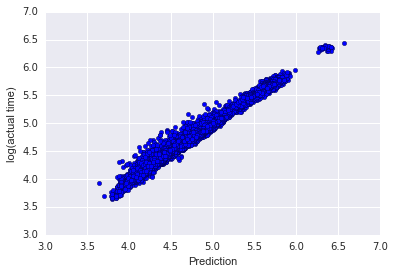

In [314]:
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(pred5, y)
plt.xlabel('Prediction')
plt.ylabel('log(actual time)')
plt.show()

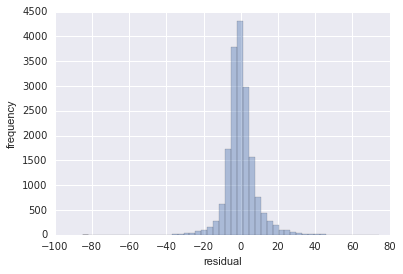

In [326]:
res = np.exp(y.actual_time_log) - np.exp(pred5)
ax = sns.distplot(res, kde=False, rug=False)
ax.set(xlabel='residual', ylabel='frequency')
plt.show()

Log transforming the data made the outcome and features all approximately normal.  Looking at the histogram of our outcome, actual time in minutes, shows that there may be a better transformation for the data and may actually be best binned into categories.  But for the purpose of this excercise, plotting the residuals and the predicted vs. outcome shows the residuals to be very normally distributed and tight, and the prediction plot has lass variability as well.  Overall, the model benefitted from the data transformations.

# Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [318]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

model6 = LinearRegression().fit(X_train, y_train)
pred6 = model6.predict(X_test)

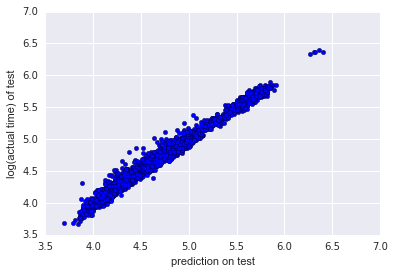

In [325]:
plt.scatter(pred6, y_test)
plt.xlabel('prediction on test')
plt.ylabel('log(actual time) of test')
plt.rcParams['figure.figsize'] = (6,4)
plt.show()